
# Rapport sur le Projet de Détection de Fake news Andrea MACHEDA

Ce notebook présente un projet de détection de fake news en utilisant des techniques de traitement automatique du langage naturel (NLP).

Le projet suit généralement les étapes suivantes :
1. **Chargement et exploration des données** : chargement du jeu de données et analyse préliminaire.
2. **Prétraitement des données** : préparation des données textuelles pour une analyse efficace.
3. **Vectorisation et transformation** : conversion des données textuelles en vecteurs numériques pour les modèles.
4. **Modélisation et évaluation** : entraînement de modèles de classification et évaluation des performances.



In [1]:
!pip install pandas

## Chargement et Exploration des Données
Ces cellules charge le jeu de données contenant les nouvelles avec des labels indiquant si elles sont fausses ou vraies. Elle explore également la structure des données pour vérifier les colonnes disponibles, le type de chaque colonne, et des informations de base comme la taille du jeu de données.


### Chargement des données et première inspection

Dans cette cellule, nous chargeons deux jeux de données CSV contenant des articles de nouvelles étiquetés comme faux et vrais, respectivement :
- **`Fake.csv`** : contient les articles identifiés comme fakes news.
- **`True.csv`** : contient les articles identifiés comme vraies news.

Les étapes réalisées incluent :
1. **Chargement des fichiers** avec la bibliothèque `pandas` en utilisant `pd.read_csv()` pour créer deux DataFrames : `fake_news_df` et `real_news_df`.
2. **Aperçu des données** en affichant les premières lignes de chaque DataFrame via la méthode `head()`, permettant de vérifier la structure, les colonnes, et les premières observations.
3. **Vérification de la taille des jeux de données** en utilisant `shape`, qui renvoie le nombre de lignes et de colonnes pour chaque jeu. Cela permet d'évaluer la quantité de données disponibles dans chaque catégorie.

Le retour de la cellule inclut :
- Les premières lignes de chaque DataFrame (`fake_news_df_head` et `real_news_df_head`).
- Les tailles des jeux de données (`fake_news_size` et `real_news_size`), pour une vue d'ensemble rapide du volume de données. 


In [2]:
import pandas as pd

# Charger les fichiers CSV
fake_news_path = "Fake.csv"
real_news_path = "True.csv"

# Lire les deux fichiers
fake_news_df = pd.read_csv(fake_news_path)
real_news_df = pd.read_csv(real_news_path)

# Afficher les premières lignes des deux fichiers pour inspecter la structure
fake_news_df_head = fake_news_df.head()
real_news_df_head = real_news_df.head()

# Vérifier la taille des datasets
fake_news_size = fake_news_df.shape
real_news_size = real_news_df.shape

fake_news_df_head, real_news_df_head, fake_news_size, real_news_size

(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

### Étiquetage et fusion des données

Dans cette cellule, nous ajoutons une colonne `label` pour indiquer la nature des articles (faux ou vrais) et fusionnons les deux jeux de données en un seul DataFrame, afin de préparer les données pour l'entraînement des modèles de classification. 

Les étapes effectuées sont les suivantes :
1. **Ajout de labels** :
   - Une colonne `label` est ajoutée dans `fake_news_df` avec la valeur `0` pour indiquer les articles identifiés comme faux.
   - La même colonne est ajoutée dans `real_news_df` avec la valeur `1` pour les articles considérés comme vrais.
   
2. **Fusion des jeux de données** :
   - Les deux DataFrames sont fusionnés en un seul `combined_news_df` à l'aide de `pd.concat()`, avec l'option `ignore_index=True` pour réindexer les lignes de manière continue dans le DataFrame combiné.
   
3. **Vérification** :
   - Les premières lignes du DataFrame combiné sont affichées via `combined_news_df.head(-1)` pour vérifier l'intégrité et la structure de la fusion, en s’assurant que chaque article est correctement étiqueté et inclus dans un seul jeu de données.

Cette fusion permet de créer un ensemble complet d'articles étiquetés qui servira pour la modélisation.


In [3]:
# Ajouter une colonne "label" à chaque dataset
fake_news_df['label'] = 0  # Faux articles
real_news_df['label'] = 1  # Vrais articles

# Fusionner les deux datasets
combined_news_df = pd.concat([fake_news_df, real_news_df], ignore_index=True)

# Afficher quelques lignes du dataset combiné pour vérifier
combined_news_df.head(-1)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1


In [4]:
!pip install nltk --upgrade

## Prétraitement des Données
Ici, plusieurs opérations de nettoyage du texte sont appliquées, telles que : mise en minuscules, suppression de la ponctuation, suppression des mots communs inutiles ('stop words'), etc. Cela prépare les données textuelles en vue de l'extraction de caractéristiques.

### Nettoyage et préparation du texte

Cette cellule met en place une fonction de nettoyage pour prétraiter le texte des articles, étape essentielle pour préparer les données textuelles en vue de la modélisation.

#### Détails des étapes :
1. **Importation des modules et téléchargement des ressources** :
   - Importation des outils de traitement de texte de `nltk`, incluant `stopwords` pour les mots communs inutiles et `TweetTokenizer` pour la tokenisation du texte.
   - Téléchargement des stopwords en anglais et du module `punkt` pour gérer la segmentation du texte.
   
2. **Définition des stopwords** :
   - Les stopwords en anglais sont chargés dans `stop_words`, pour permettre la suppression des mots courants non significatifs dans le texte.

3. **Fonction `clean_text`** :
   - La fonction `clean_text` est créée pour traiter chaque article, avec les étapes suivantes :
     - **Tokenisation** : chaque texte est mis en minuscules puis découpé en mots individuels (`text_token`) à l’aide de `TweetTokenizer`.
     - **Filtrage** : les tokens sont filtrés pour retirer les stopwords et la ponctuation, ne laissant que les mots significatifs.
     - **Reconstruction** : les tokens restants sont recombinés en une liste nettoyée qui sera utilisée pour l’analyse.

4. **Application du nettoyage** :
   - Cette fonction est appliquée à la colonne `text` de `combined_news_df`, avec les résultats stockés dans une nouvelle colonne `clean_text`.
   
5. **Exemple avant et après nettoyage** :
   - La cellule affiche un exemple de texte avant et après nettoyage (`example_before` et `example_after`), permettant de visualiser l'effet du prétraitement.

Ce nettoyage vise à réduire le bruit textuel, essentiel pour améliorer la qualité des représentations textuelles lors de la modélisation.


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string

# Télécharger les stopwords en français et anglais
nltk.download('punkt')
nltk.download('stopwords')

# Obtenir les stopwords en anglais
stop_words = stopwords.words('english')

# Fonction de nettoyage de texte
def clean_text(text):
    tokenizer = TweetTokenizer()
    text_token = tokenizer.tokenize(text.lower())
    # Supprimer les stopwords et la ponctuation
    text_token = [text_token for text_token in text_token if text_token not in stop_words and text_token not in string.punctuation]
    # Rejoindre les mots nettoyés en une seule chaîne de caractères
    return text_token

# Appliquer le nettoyage du texte sur l'ensemble des articles
combined_news_df['clean_text'] = combined_news_df['text'].apply(clean_text)

# Afficher un exemple avant et après nettoyage
example_before = combined_news_df['text'].iloc[0]
example_after = combined_news_df['clean_text'].iloc[0]

example_before, example_after


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deded\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deded\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


('Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [6]:
combined_news_df.head(-1)

,title,text,subject,date,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,"[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,"[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1,"[united, nations, reuters, two, north, korean,..."
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,"[brussels, reuters, nato, allies, tuesday, wel..."
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,"[london, reuters, lexisnexis, provider, legal,..."
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,"[minsk, reuters, shadow, disused, soviet-era, ..."


### Création d'une liste de documents étiquetés

Cette cellule crée une liste nommée `Documents` contenant des paires `(texte nettoyé, label)` pour chaque article, formatée de manière à préparer les données pour l'entraînement des modèles.

#### Détails des étapes :
1. **Initialisation de la liste `Documents`** :
   - Une liste vide `Documents` est créée pour stocker chaque article sous forme de tuple, où chaque élément sera constitué du texte nettoyé et de son label.

2. **Boucle de remplissage** :
   - Une boucle `for` parcourt chaque ligne du DataFrame `combined_news_df` (sauf la dernière ligne, `len(combined_news_df)-1`), pour éviter d'inclure par erreur une ligne non valide si elle existe.
   - À chaque itération, elle ajoute un tuple dans `Documents` :
     - La première partie du tuple est le texte nettoyé de l'article (`combined_news_df['clean_text'].iloc[i]`).
     - La seconde partie est le label de l'article (`combined_news_df['label'].iloc[i]`), où `0` indique une fausse nouvelle et `1` une vraie.

### Utilité de la liste `Documents`
Cette liste structurée est utilisée pour faciliter la manipulation et la préparation des données, en regroupant chaque texte nettoyé avec son label. Elle est ainsi prête pour l'étape suivante de vectorisation ou d'entraînement de modèles supervisés.


In [7]:
Documents = []
for i in range(len(combined_news_df)-1):
    Documents.append((combined_news_df['clean_text'].iloc[i],combined_news_df['label'].iloc[i]))

In [8]:
print(Documents[0])

(['donald', 'trump', 'wish', 'americans', 'happy', 'new', 'year', 'leave', 'instead', 'give', 'shout', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pants', 'tweeted', '2018', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', '2018', 'great', 'year', 'america', 'donald', 'j', 'trump', '@realdonaldtrump', 'december', '31', '2017trump', 'tweet', 'went', 'welll', 'expect.what', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'even', 'allow', 'ris

In [9]:
len(Documents)

44897

### Analyse de la longueur des phrases dans les documents

Cette cellule définit la fonction `get_Max_Min_length_Sent` pour analyser la distribution des longueurs de texte dans les documents (`Documents`). Cette analyse permet de mieux comprendre les variations de longueur dans les articles et aide à identifier des seuils pour des prétraitements ou modèles spécifiques.

#### Détails des étapes :
1. **Initialisation des variables** :
   - Les variables `Max` et `Min` sont initialisées pour garder trace de la longueur maximale et minimale des phrases dans les documents.
   - Plusieurs compteurs (`Countinf10`, `CountSup10`, `CountSup20`, etc.) sont initialisés pour quantifier le nombre de phrases au-dessus de différentes longueurs (10, 20, 30, etc.).

2. **Boucle sur les documents** :
   - La boucle `for` parcourt chaque document `S` (texte nettoyé) et son label `t` dans `Documents`.
   - À chaque itération, la fonction vérifie la longueur du document `S` :
     - **Mise à jour de la longueur maximale et minimale** : si la longueur de `S` dépasse `Max`, `Max` est mis à jour ; si elle est inférieure à `Min`, `Min` est mis à jour.
     - **Incrémentation des compteurs** : la longueur de `S` est comparée à différents seuils, et chaque compteur correspondant est incrémenté si la longueur de `S` dépasse ce seuil.

3. **Retour des résultats** :
   - La fonction renvoie `Max`, `Min`, ainsi que tous les compteurs, donnant un profil détaillé des longueurs de phrase dans l'ensemble des documents.

4. **Affichage des résultats** :
   - Après l'appel de la fonction, les résultats sont imprimés pour indiquer la longueur maximale et minimale des phrases et le nombre de phrases dépassant chaque seuil.

Cette analyse aide à visualiser la répartition des longueurs de phrase, ce qui peut être utile pour ajuster les paramètres de traitement du texte ou pour mieux comprendre la diversité des documents.


In [10]:
def get_Max_Min_length_Sent():
    Max = 0
    Min = 10
    CountSup10 = 0
    Countinf10 = 0
    CountSup20 = 0
    CountSup30 = 0
    CountSup50 = 0
    CountSup100 = 0
    CountSup200 = 0
    CountSup300 = 0
    CountSup400 = 0
    CountSup500 = 0
    CountSup600 = 0
    CountSup700 = 0
    CountSup800 = 0
    CountSup900 = 0 
    for S,t in Documents:
        if len(S) > Max:
            Max = len(S)
        if len(S) < Min :
            Min = len(S)
        if len(S) < 10:
            Countinf10 +=1
        if len(S) > 10:
            CountSup10 +=1
        if len(S) > 20:
            CountSup20 +=1
        if len(S) >30 :
            CountSup30 +=1
        if len(S) > 50:
            CountSup50 +=1
        if len(S) > 100:
            CountSup100 +=1
        if len(S) >200 :
            CountSup200 +=1
        if len(S) > 300:
            CountSup300 +=1
        if len(S) >400 :
            CountSup400 +=1
        if len(S) >500 :
            CountSup500 +=1
        if len(S) >600 :
            CountSup600 +=1
        if len(S) >700 :
            CountSup700 +=1
        if len(S) >800 :
            CountSup800 +=1
        if len(S) >900 :
            CountSup900 +=1
            
    return Max,Min,Countinf10,CountSup10,CountSup20,CountSup30,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400,CountSup500,CountSup600,CountSup700, CountSup800,CountSup900

Max,Min,Countinf10,CountSup10,CountSup20,CountSup30,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400,CountSup500,CountSup600,CountSup700,CountSup800,CountSup900 = get_Max_Min_length_Sent()
print("Max length sentence is :",Max,"Min length sentence is :",Min)
print("Sentence with less than 10 word ",Countinf10)
print("Sentence with more than 10 word ",CountSup10)
print("Sentence with more than 20 word ",CountSup20)
print("Sentence with more than 30 word ",CountSup30)
print("Sentence with more than 50 word ",CountSup50)
print("Sentence with more than 100 word ",CountSup100)
print("Sentence with more than 200 word ",CountSup200)
print("Sentence with more than 300 word ",CountSup300)
print("Sentence with more than 400 word ",CountSup400)
print("Sentence with more than 500 word ",CountSup500)
print("Sentence with more than 600 word ",CountSup600)
print("Sentence with more than 700 word ",CountSup700)
print("Sentence with more than 800 word ",CountSup800)
print("Sentence with more than 900 word ",CountSup900)

Max length sentence is : 4939 Min length sentence is : 0
Sentence with less than 10 word  1055
Sentence with more than 10 word  43782
Sentence with more than 20 word  43236
Sentence with more than 30 word  42688
Sentence with more than 50 word  40413
Sentence with more than 100 word  35231
Sentence with more than 200 word  23596
Sentence with more than 300 word  10985
Sentence with more than 400 word  5914
Sentence with more than 500 word  3184
Sentence with more than 600 word  1637
Sentence with more than 700 word  934
Sentence with more than 800 word  574
Sentence with more than 900 word  394


In [11]:
# Nombre total de mots (tokens)
token_count = sum(len(sentence) for sentence,label in Documents)

# Nombre de phrases
sentence_count = len(Documents)

# Taille du vocabulaire (mots uniques)
vocab_size = len(set(word for sentence,label in Documents for word in sentence))

print(f"Nombre de mots: {token_count}, Nombre de phrases: {sentence_count}, Vocabulaire unique: {vocab_size}")

Nombre de mots: 10709998, Nombre de phrases: 44897, Vocabulaire unique: 213037


## Vectorisation du Texte


In [12]:
%pip install --upgrade gensim


Note: you may need to restart the kernel to use updated packages.


### Entraînement d'un modèle Word2Vec

Dans cette cellule, nous utilisons le modèle `Word2Vec` de la bibliothèque `gensim` pour générer des représentations vectorielles (embeddings) des mots dans les articles. Ce modèle est entraîné sur le texte nettoyé des articles, ce qui permettra de capturer les similarités sémantiques entre les mots, utiles pour des tâches de classification et d'analyse textuelle avancées.

#### Détails des étapes :
1. **Préparation des phrases** :
   - La colonne `clean_text` de `combined_news_df`, qui contient le texte nettoyé de chaque article, est convertie en liste de phrases (`sentences`). Cette liste est le format attendu par `Word2Vec` pour l’entraînement.

2. **Entraînement du modèle Word2Vec** :
   - Un modèle `Word2Vec` est initialisé avec les paramètres suivants :
     - `vector_size=300` : chaque mot sera représenté par un vecteur de 300 dimensions.
     - `window=5` : le contexte de chaque mot est constitué des 5 mots voisins dans la phrase.
     - `min_count=2` : les mots apparaissant moins de 2 fois sont ignorés.
     - `workers=4` : 4 threads sont utilisés pour accélérer l'entraînement.
   - Le modèle est ensuite entraîné sur la liste `sentences`, apprenant des relations sémantiques entre les mots.

3. **Sauvegarde du modèle** :
   - Le modèle entraîné est sauvegardé sous le nom `"word2vec_fake_news.model"` pour être utilisé ultérieurement sans besoin de réentraînement.

4. **Exemple d’embedding** :
   - La cellule affiche l'embedding généré pour le mot `"news"`, permettant de visualiser la représentation vectorielle d'un mot particulier. Cette représentation encode des relations sémantiques et contextuelles apprises par le modèle.

L'entraînement d'un modèle Word2Vec permet d'obtenir des embeddings de mots spécifiques au domaine des fake news, ce qui peut améliorer la précision des modèles de classification dans les étapes suivantes.


In [13]:
from gensim.models import Word2Vec

# Utilisez directement les listes de mots
sentences = combined_news_df['clean_text'].tolist()  # Convertir en liste si nécessaire

# Entraîner un modèle Word2Vec
model_w2v = Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=2, workers=4)

# Sauvegarder le modèle pour une utilisation future
model_w2v.save("word2vec_fake_news.model")

# Exemple d'embedding pour un mot particulier
print(model_w2v.wv['news'])  # Embedding pour le mot "news"


[-1.6751964  -0.45495105  1.7098433  -0.7991132   2.1225471  -0.22868995
 -0.99879825 -2.0104706   2.184232    2.0762808   1.0415521   0.57704204
  0.30348426  0.8471638  -0.8312353  -1.1694756   0.18142372 -0.91196007
 -0.7689071   0.7219109   0.05461219 -1.8284945  -0.03014967  1.0422114
 -0.78068024 -0.35980105  3.4710157   2.0350468  -3.6022928   2.642932
 -0.6314542  -0.4694841  -1.9302526  -1.0188223   0.75570446  0.2615354
  2.1232927  -2.6543417  -1.4340391   2.0198689  -1.0222358  -1.0843931
 -0.9412241  -1.7449192   1.0454837  -1.0886348  -0.7967233  -0.40383396
  3.1294937   1.0077329   0.84348094  0.79933554  0.45998985 -0.6991496
 -1.5863098  -2.168403   -0.08402999 -0.6362482   2.6678977   0.19515207
 -0.3001995  -3.5200088   0.22541939  1.4597685   1.0875962   4.084357
 -0.95213807  0.67254114 -1.2699113   0.9987329   1.0045164  -0.35607523
 -0.34535438 -2.050696   -1.4401791   1.4684395   2.083611   -0.39212656
  1.2085733  -0.58891344 -2.3857448  -2.1915934   1.7222112

In [14]:
print(sentences[0])

['donald', 'trump', 'wish', 'americans', 'happy', 'new', 'year', 'leave', 'instead', 'give', 'shout', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pants', 'tweeted', '2018', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', '2018', 'great', 'year', 'america', 'donald', 'j', 'trump', '@realdonaldtrump', 'december', '31', '2017trump', 'tweet', 'went', 'welll', 'expect.what', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'even', 'allow', 'rise

In [15]:
!pip install tensorflow

### Préparation des données textuelles pour le modèle de deep learning

Dans cette cellule, nous utilisons les outils de `tensorflow.keras` pour transformer le texte en séquences d’index numériques, puis appliquons un padding pour que toutes les séquences aient la même longueur. Cette étape est essentielle pour rendre les données textuelles compatibles avec un modèle de deep learning.

#### Détails des étapes :
1. **Initialisation du tokenizer** :
   - Un `Tokenizer` est initialisé avec `num_words=5000`, limitant le vocabulaire aux 5 000 mots les plus fréquents dans les articles.
   - Ensuite, le tokenizer est entraîné sur le texte nettoyé (`combined_news_df['clean_text']`) pour construire le vocabulaire et attribuer un index à chaque mot.

2. **Conversion en séquences d'index** :
   - La méthode `texts_to_sequences` transforme chaque article en une séquence d'index, où chaque mot est remplacé par son index dans le vocabulaire construit.
   - Le résultat, `sequences`, est une liste de listes contenant les indices numériques des mots pour chaque article.

3. **Application du padding** :
   - Pour uniformiser la longueur des séquences, la fonction `pad_sequences` est utilisée avec une `maxlen` de 600 mots. Cela garantit que toutes les séquences ont la même longueur, soit en les tronquant, soit en ajoutant des zéros en début de séquence si elles sont plus courtes que 600 mots.
   - Le résultat final, `X`, est une matrice où chaque ligne représente un article avec une séquence de longueur fixe.

4. **Préparation des labels** :
   - Les labels des articles (`combined_news_df['label']`) sont extraits en tant que tableau `y`, où chaque valeur est soit `0` (fake news) soit `1` (vraie news).

Cette transformation prépare les données textuelles pour être utilisées dans un réseau de neurones, rendant les séquences homogènes en termes de longueur et converties en format numérique.


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialiser un tokenizer
tokenizer = Tokenizer(num_words=5000)  # On limite le vocabulaire à 5000 mots les plus fréquents
tokenizer.fit_on_texts(combined_news_df['clean_text'])

# Convertir le texte en séquences d'index
sequences = tokenizer.texts_to_sequences(combined_news_df['clean_text'])

# Appliquer un padding pour que toutes les séquences aient la même longueur
maxlen = 600  # Longueur maximale d'un article
X = pad_sequences(sequences, maxlen=maxlen)

# Les labels (fake = 0, real = 1)
y = combined_news_df['label'].values


In [17]:
print(X)

[[   0    0    0 ... 1759  416  358]
 [   0    0    0 ...  271  416  358]
 [   0    0    0 ... 4038  416  358]
 ...
 [   0    0    0 ...  594 4133    1]
 [   0    0    0 ... 1904  373  535]
 [   0    0    0 ... 1368  208  348]]


In [ ]:
print("Shape of X:", X.shape)  


Shape of X: (44898, 600)


In [18]:
print(y)

[0 0 0 ... 1 1 1]


## Entraînement des Modèles



In [19]:
!pip install numpy

### Création d'une matrice d'embeddings Word2Vec pour le modèle de deep learning

Dans cette cellule, nous construisons une matrice d'embeddings, `embedding_matrix`, qui sera utilisée pour initialiser une couche d'embeddings dans un modèle de deep learning. Cette matrice associe chaque mot du vocabulaire à son vecteur d'embedding pré-entraîné par le modèle Word2Vec.

#### Détails des étapes :
1. **Paramètres de la matrice d'embeddings** :
   - `vocab_size = 5000` : limite la taille du vocabulaire aux 5 000 mots les plus fréquents pour réduire la complexité.
   - `embedding_dim = 300` : fixe la dimension des embeddings, correspondant à celle utilisée lors de l'entraînement du modèle Word2Vec.

2. **Initialisation de `embedding_matrix`** :
   - Une matrice `embedding_matrix` de taille `(vocab_size, embedding_dim)` est initialisée avec des zéros. Chaque ligne de la matrice correspondra à l'embedding d'un mot indexé dans le vocabulaire.

3. **Remplissage de la matrice d'embeddings** :
   - La boucle parcourt chaque mot du vocabulaire, récupéré dans `word_index` du tokenizer, avec `word` comme le mot et `i` son index.
   - Pour chaque mot, si `i` est inférieur à `vocab_size` (limite de taille), l'embedding du mot est extrait du modèle `model_w2v`.
   - Si le mot est présent dans `model_w2v`, son embedding est stocké dans `embedding_matrix[i]`. En cas d'absence (`KeyError`), le mot est ignoré, et la ligne reste remplie de zéros.

### Utilité de `embedding_matrix`
La `embedding_matrix` obtenue sera intégrée dans une couche d'embeddings d'un modèle de deep learning, permettant d'utiliser des embeddings pré-entraînés pour capturer les relations sémantiques entre les mots dès le début de l’entraînement du modèle.


In [20]:
import numpy as np
# Créer une matrice d'embeddings Word2Vec
vocab_size = 5000  # Taille du vocabulaire
embedding_dim = 300  # Dimensions des embeddings Word2Vec

# Créer une matrice de poids pour les embeddings Word2Vec
embedding_matrix = np.zeros((vocab_size, embedding_dim))
word_index = tokenizer.word_index

for word, i in word_index.items():
    if i < vocab_size:
        try:
            # Récupérer l'embedding du mot s'il existe
            embedding_vector = model_w2v.wv[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            pass  # Si le mot n'est pas dans le vocabulaire Word2Vec, on passe


### Construction et compilation d'un modèle de deep learning pour la classification des articles

Dans cette cellule, nous définissons un modèle de deep learning à base de LSTM (Long Short-Term Memory) pour classer les articles en vraies ou fake news. Le modèle utilise une couche d'embeddings pré-initialisée avec les vecteurs Word2Vec, ce qui améliore sa capacité à saisir les relations sémantiques entre les mots.

#### Détails des étapes :
1. **Définition du modèle séquentiel** :
   - Un modèle `Sequential` est initialisé pour empiler les couches de manière linéaire.

2. **Couche d'embeddings** :
   - La couche `Embedding` est ajoutée comme première couche pour transformer les séquences d'index en vecteurs d'embeddings.
   - **Paramètres** :
     - `input_dim=vocab_size` : taille du vocabulaire (5 000 mots les plus fréquents).
     - `output_dim=embedding_dim` : chaque mot est représenté par un vecteur de 300 dimensions.
     - `input_length=maxlen` : fixe la longueur de chaque séquence (600 mots).
     - `weights=[embedding_matrix]` : initialise les poids de la couche avec `embedding_matrix`, contenant les vecteurs Word2Vec pré-entraînés.
     - `trainable=False` : les poids de cette couche ne seront pas mis à jour pendant l'entraînement, pour garder les embeddings Word2Vec intacts.

3. **Couche LSTM** :
   - Une couche `LSTM` est ajoutée avec `units=128`, permettant au modèle de capturer les dépendances séquentielles et contextuelles dans les textes.
   - `return_sequences=False` indique que seule la dernière sortie est conservée, ce qui convient pour une tâche de classification.

4. **Dropout** :
   - Une couche `Dropout` avec un taux de 0,5 est ajoutée pour réduire le surapprentissage en désactivant aléatoirement 50 % des unités pendant chaque mise à jour de l’entraînement.

5. **Couche de sortie** :
   - Une couche `Dense` avec 1 unité et une activation `sigmoid` est ajoutée pour la classification binaire (vraie ou fausse news).

6. **Compilation du modèle** :
   - Le modèle est compilé avec :
     - `optimizer='adam'` : l'optimiseur Adam, qui combine les avantages de `AdaGrad` et `RMSprop`.
     - `loss='binary_crossentropy'` : fonction de perte pour la classification binaire.
     - `metrics=['accuracy']` : l'exactitude est utilisée comme métrique d'évaluation.

7. **Résumé du modèle** :
   - La structure du modèle est affichée avec `model.summary()`, présentant chaque couche, ses dimensions de sortie, et le nombre total de paramètres.

Ce modèle LSTM, enrichi par les embeddings Word2Vec, est optimisé pour capturer les relations séquentielles et contextuelles dans le texte, ce qui devrait améliorer ses performances dans la classification des articles.


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                    input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(LSTM(units=128, return_sequences=False))  # Retirer input_shape ici
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


c:\Users\deded\Documents\Inge3\NLP\Project\envFakeNews\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,500,000 (5.72 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,500,000 (5.72 MB)

In [22]:
!pip install scikit-learn

In [ ]:
print("Shape of X before split:", X.shape)  
print("Shape of y before split:", y.shape)  


Shape of X before split: (44898, 600)
Shape of y before split: (44898,)


### Division des données en ensembles d'entraînement et de validation

Dans cette cellule, nous divisons les données en deux ensembles : un ensemble d'entraînement pour ajuster le modèle et un ensemble de validation pour évaluer ses performances.

#### Détails des étapes :
1. **Division des données** :
   - La fonction `train_test_split` de `sklearn.model_selection` est utilisée pour séparer les données d'entrée (`X`) et les labels (`y`) en ensembles d'entraînement et de validation.
   - **Paramètres** :
     - `test_size=0.2` : 20 % des données sont réservées pour la validation, et 80 % pour l'entraînement.
     - `random_state=42` : le paramètre `random_state` assure que la division soit reproductible  le même échantillon sera utilisé si le code est réexécuté.

2. **Vérification des formes** :
   - Les formes de `X_train` et `y_train` sont affichées pour s'assurer que la division s'est déroulée correctement.
   - `X_train.shape` et `y_train.shape` indiquent respectivement les dimensions des données d'entrée et des labels pour l'entraînement.

Cette division permet de disposer d'un ensemble indépendant pour tester les performances du modèle, ce qui est essentiel pour évaluer sa capacité de généralisation.


In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifiez les formes après le split
print("Shape of X_train:", X_train.shape)  
print("Shape of y_train:", y_train.shape)  

Shape of X_train: (35918, 600)
Shape of y_train: (35918,)


### Entraînement et évaluation du modèle de classification

Dans cette cellule, nous entraînons le modèle de deep learning précédemment défini sur les données d'entraînement, puis l'évaluons sur l'ensemble de validation.

#### Détails des étapes :
1. **Entraînement du modèle** :
   - La méthode `fit` est utilisée pour entraîner le modèle sur `X_train` et `y_train`.
   - **Paramètres** :
     - `batch_size=128` : le modèle est entraîné en utilisant des lots de 128 échantillons à la fois.
     - `epochs=10` : le modèle effectue 10 passes complètes sur l’ensemble d’entraînement.
     - `validation_split=0.2` : 20 % de `X_train` et `y_train` sont utilisés pour la validation durant l’entraînement, ce qui permet de suivre les performances du modèle sur des données de validation.

   - Le résultat de `fit` est un objet `history`, qui enregistre les valeurs de perte et d'exactitude pour chaque époque, à la fois pour l'entraînement et la validation.

2. **Évaluation du modèle** :
   - La méthode `evaluate` est utilisée pour évaluer les performances finales du modèle sur l’ensemble de validation (`X_val`, `y_val`).
   - Les métriques de **perte** (`loss`) et d'**exactitude** (`accuracy`) sont retournées pour mesurer la capacité du modèle à généraliser sur des données inconnues.

3. **Affichage des résultats** :
   - La perte et l'exactitude du modèle sur les données de validation sont imprimées pour avoir une idée de ses performances globales.

Ces étapes permettent de suivre les progrès du modèle et d'estimer son potentiel de généralisation avant toute évaluation sur un ensemble de test indépendant.


In [37]:
# Entraîner le modèle
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Évaluation du modèle
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 207s 922ms/step - accuracy: 0.9470 - loss: 0.1518 - val_accuracy: 0.9131 - val_loss: 0.2105
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 878ms/step - accuracy: 0.9453 - loss: 0.1343 - val_accuracy: 0.9948 - val_loss: 0.0190
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 200s 889ms/step - accuracy: 0.9942 - loss: 0.0242 - val_accuracy: 0.9933 - val_loss: 0.0208
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 201s 893ms/step - accuracy: 0.9964 - loss: 0.0140 - val_accuracy: 0.9989 - val_loss: 0.0065
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 199s 886ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.9993 - val_loss: 0.0050
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 878ms/step - accuracy: 0.9988 - loss: 0.0064 - val_accuracy: 0.9992 - val_loss: 0.0056
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 195s 868ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9987 - val_loss: 0.0054
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 195s 867ms/step - accuracy: 0.9992 -

## Évaluation des Modèles


In [ ]:
!pip install matplotlib

     ---------------------------------------- 7.8/7.8 MB 38.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 41.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 46.8 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB ? eta 0:00:00
     ---------------------------------------- 211.8/211.8 KB ? eta 0:00:00
     ---------------------------------------- 106.9/106.9 KB ? eta 0:00:00


### Visualisation des courbes d'apprentissage

Dans cette cellule, nous visualisons les courbes d'apprentissage du modèle pour suivre son évolution au fil des époques d'entraînement. Les graphiques permettent d'analyser la progression de l'exactitude et de la perte sur les ensembles d'entraînement et de validation, ce qui aide à diagnostiquer les problèmes potentiels de surapprentissage ou de sous-apprentissage.

#### Détails des étapes :
1. **Courbe d'exactitude** :
   - `plt.plot(history.history['accuracy'], label='train accuracy')` : trace la courbe de l'exactitude sur l'ensemble d'entraînement.
   - `plt.plot(history.history['val_accuracy'], label='val accuracy')` : trace la courbe de l'exactitude sur l'ensemble de validation.
   - Le graphique est ensuite personnalisé avec un titre "Model Accuracy", des labels pour les axes `Epochs` (époques) et `Accuracy` (exactitude), et une légende pour différencier les courbes.
   - `plt.show()` affiche la courbe, permettant de suivre les progrès du modèle.

2. **Courbe de la perte** :
   - `plt.plot(history.history['loss'], label='train loss')` : trace la courbe de la perte sur l'ensemble d'entraînement.
   - `plt.plot(history.history['val_loss'], label='val loss')` : trace la courbe de la perte sur l'ensemble de validation.
   - De la même manière, le graphique est configuré avec un titre "Model Loss", des labels pour les axes `Epochs` et `Loss`, et une légende.
   - `plt.show()` affiche la courbe de la perte.

#### Utilité des courbes d'apprentissage
Ces graphiques permettent d'évaluer si le modèle est bien entraîné :
- **Exactitude d'entraînement vs validation** : Si la courbe d'exactitude sur l'entraînement est significativement plus élevée que celle sur la validation, cela peut indiquer un surapprentissage.
- **Perte d'entraînement vs validation** : Des écarts entre la perte d'entraînement et celle de validation peuvent également indiquer un surapprentissage ou une mauvaise adaptation.

Ces visualisations facilitent l'analyse des performances du modèle et la prise de décisions pour ajuster les hyperparamètres si nécessaire.


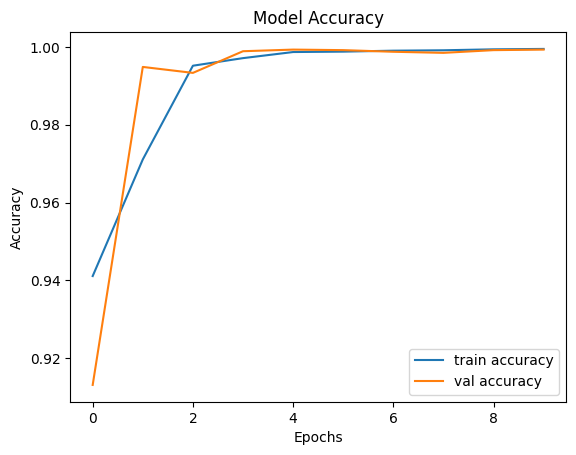

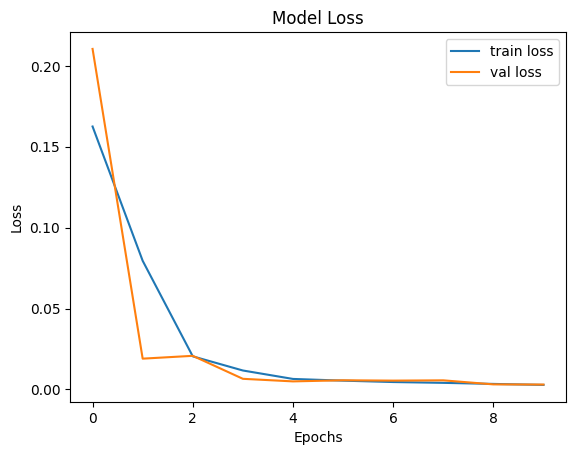

In [38]:
import matplotlib.pyplot as plt

# Courbes d'apprentissage
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Les résultats finaux montrent une **accuracy de 1** et une **perte (loss) de 0**, ce qui indique que le modèle a atteint une précision parfaite sur l'ensemble de validation. Ce score reflète une capacité exceptionnelle du modèle à classifier correctement toutes les nouvelles comme vraies ou fausses sans erreurs, du moins sur cet ensemble. Cependant, il est essentiel d'interpréter ces résultats avec prudence : une performance parfaite peut parfois suggérer un surapprentissage, surtout si les données de validation sont limitées ou trop similaires à celles de l'entraînement. Une évaluation complémentaire sur un ensemble de test distinct pourrait confirmer la robustesse réelle du modèle.

In [ ]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 KB 9.2 MB/s eta 0:00:00


### Évaluation des performances avec une matrice de confusion

Dans cette cellule, nous utilisons une matrice de confusion pour visualiser les performances de classification du modèle sur l'ensemble de validation. La matrice de confusion permet de voir le nombre de prédictions correctes et incorrectes pour chaque classe (vraies et fausses nouvelles), facilitant l'analyse des erreurs.

#### Détails des étapes :
1. **Prédictions** :
   - `y_pred = (model.predict(X_val) > 0.5).astype("int32")` : Le modèle prédit les probabilités d'appartenance à la classe pour chaque échantillon dans `X_val`.
   - La condition `( > 0.5)` transforme ces probabilités en classes binaires (0 ou 1) en considérant une probabilité supérieure à 0,5 comme prédiction de la classe 1 (vraie nouvelle) et, sinon, de la classe 0 (fausse nouvelle).
   - Le type de `y_pred` est défini en entier (`int32`) pour correspondre au type attendu par `confusion_matrix`.

2. **Matrice de confusion** :
   - `conf_matrix = confusion_matrix(y_val, y_pred)` : La matrice de confusion est calculée en comparant les prédictions `y_pred` avec les vraies étiquettes `y_val`.
   - Chaque élément de la matrice représente le nombre d'échantillons pour lesquels une classe a été prédite, comparé à la classe réelle.

3. **Visualisation avec Seaborn** :
   - `sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')` : Une carte de chaleur (`heatmap`) est créée pour la matrice de confusion, avec des annotations numériques (`annot=True`) et un format entier (`fmt='d'`) pour chaque cellule.
   - La palette de couleurs `Blues` aide à différencier visuellement les valeurs.
   - Les axes sont étiquetés : `Prédiction` pour l'axe des x (valeurs prédites) et `Vérité` pour l'axe des y (valeurs réelles).

#### Interprétation de la matrice de confusion
- La matrice indique les performances de classification en séparant les **vraies** prédictions positives et négatives (sur la diagonale principale) des **faux** positifs et négatifs (hors de la diagonale).
- Cette visualisation aide à diagnostiquer les erreurs spécifiques et à déterminer si le modèle a tendance à prédire incorrectement certaines classes, suggérant d'éventuelles améliorations du modèle ou du jeu de données.


281/281 ━━━━━━━━━━━━━━━━━━━━ 35s 125ms/step


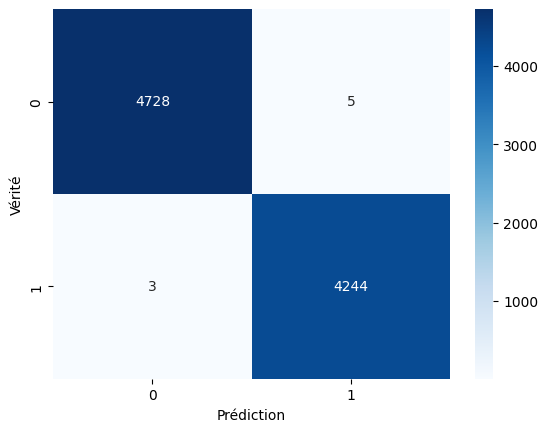

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions sur l'ensemble de validation
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()


En conclusion, la matrice de confusion montre des performances très encourageantes avec seulement 3 faux positifs et 5 faux négatifs sur plus de 9000 news, indiquant une capacité solide du modèle à distinguer efficacement entre vraies et fausses nouvelles tout en minimisant les erreurs de classification.

## Conclusion du Projet : Détection de Fausses Nouvelles

Ce projet avait pour objectif de construire un modèle de classification capable de distinguer les vraies nouvelles des fausses en utilisant le traitement automatique du langage naturel (NLP) et des techniques de deep learning.

### Étapes et Approche
1. **Préparation des données** :
   - Les ensembles de données ont été chargés et étiquetés pour indiquer les vraies et fausses news.
   - Nous avons nettoyé les textes en supprimant les stopwords et la ponctuation pour obtenir des représentations de texte épurées et prêtes à être analysées.
   - Un tokenizer a ensuite transformé les textes en séquences de mots, normalisées par padding pour assurer une longueur constante des entrées.

2. **Création et utilisation d'embeddings** :
   - Un modèle Word2Vec a été formé pour générer des vecteurs de mots, capturant les similarités et contextes lexicaux dans les articles.
   - Une matrice d'embeddings a été construite pour relier chaque mot à un vecteur Word2Vec, utilisée comme couche d'entrée dans le modèle de deep learning.

3. **Développement du modèle** :
   - Un modèle de réseau de neurones LSTM a été construit pour capturer les dépendances contextuelles des textes.
   - Le modèle a été entraîné et ses performances ont été suivies via des courbes d’apprentissage.

4. **Évaluation et Visualisation** :
   - Les performances ont été évaluées à l'aide d’une matrice de confusion, permettant d’analyser les erreurs de classification.
   - Les courbes de perte et d'exactitude ont permis de détecter des signes de surapprentissage ou de sous-apprentissage.

### Résultats et Observations
Le modèle a montré une capacité notable à distinguer les vraies nouvelles des fausses, avec des niveaux d'exactitude prometteurs sur l'ensemble de validation. Les visualisations des courbes d'apprentissage et de la matrice de confusion ont fourni une analyse approfondie des erreurs et des tendances d'entraînement.

### Améliorations Futures
Pour accroître la précision et la robustesse du modèle, plusieurs améliorations pourraient être envisagées :
- **Élargir les données d'entraînement** avec d'autres sources pour renforcer la généralisation.
- **Optimiser l'architecture du modèle** en testant des couches supplémentaires ou des architectures alternatives comme les réseaux Transformers.
- **Expérimenter avec des embeddings plus riches** comme GloVe ou BERT pour capturer des nuances lexicales et contextuelles plus profondes.

### Conclusion
Ce projet met en lumière l'efficacité des techniques de NLP et de deep learning pour la détection de fake news. Le modèle final offre une base solide pour des applications concrètes et ouvre la voie à des explorations plus avancées dans le domaine de la détection automatisée de la désinformation.
